<a href="https://colab.research.google.com/github/shrad1997/hierarchical_clustering/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv("/content/crime_data.csv")

In [47]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [48]:
 df.rename(columns = {'Unnamed: 0':'US_State'},inplace=True)


In [49]:
df.head(5)

,US_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [50]:
df.notnull().count()

US_State    50
Murder      50
Assault     50
UrbanPop    50
Rape        50
dtype: int64

In [51]:
#normalisation function
def norm_func(i):
  x= (i-i.min())/(i.max()-i.min())
  return x


In [52]:
#normalised data frame
df_norm=norm_func(df.iloc[:,1:])

In [53]:
df_norm.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


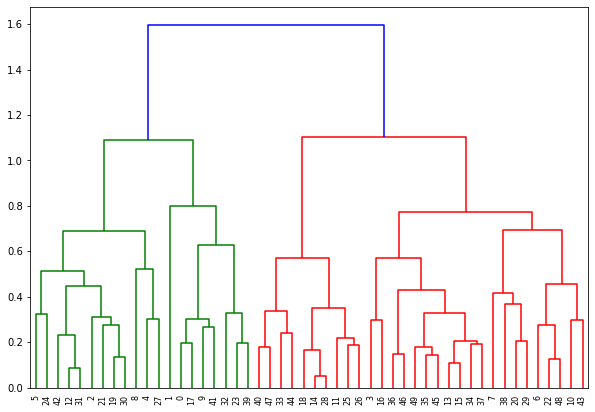

In [55]:
#create dendogram
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))


In [56]:
#create clusters
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [57]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [68]:
#save cluster for chart
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc)

In [69]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [70]:
#adding column in main data frame
df['cluster_number']=clusters

In [71]:
df.head(5)

,US_State,Murder,Assault,UrbanPop,Rape,cluster_number
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


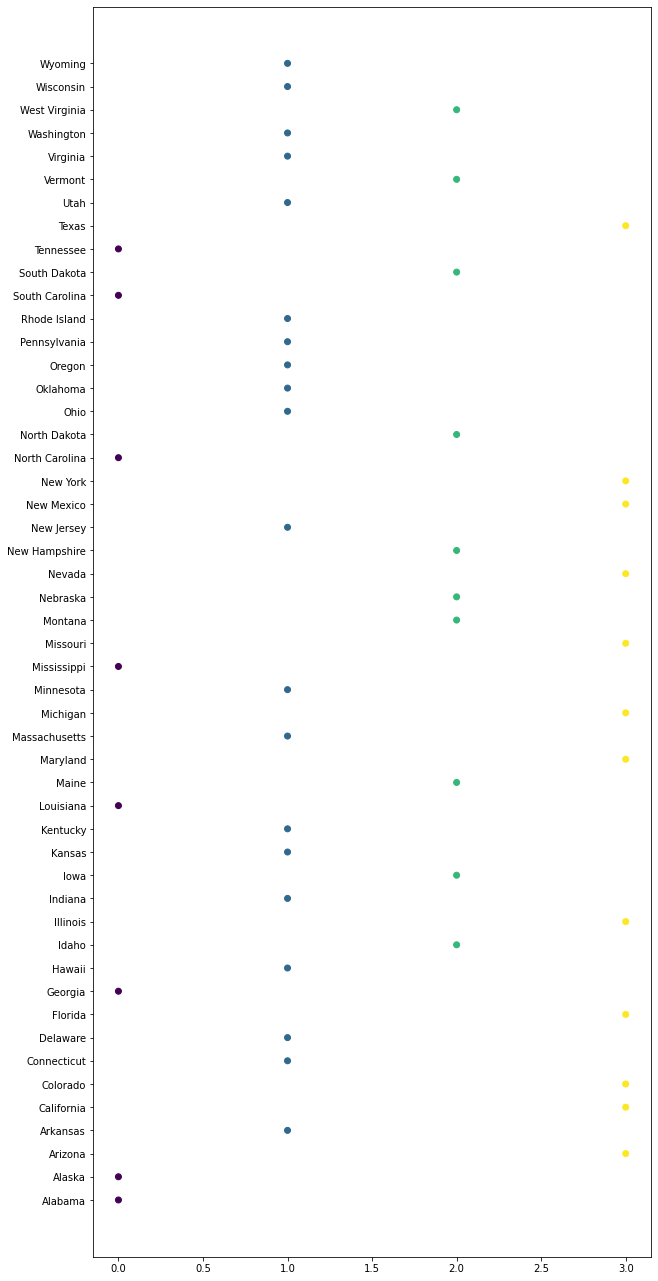

In [85]:
# Plot Clusters
plt.figure(figsize=(10, 23))  
plt.scatter(df['cluster_number'],df['US_State'],c=y_hc)